In [19]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.options.display.max_columns = None

In [20]:
df = pd.read_csv('data/analytic_data2019.csv', low_memory=False)
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

### Remove extraneous columns used for calculations

In [21]:
headers_ = [x for x in df.columns if 'raw value' in x 
            or 'FIPS' in x 
            or 'State Abbreviation' in x 
            or 'Name' in x 
            or 'Release Year' in x
            or 'County Ranked' in x
            or 'Percentage of households' in x
            ]

df = df[headers_]
df.shape

(3195, 115)

### Remove National and State level aggregators, and unnecessary secondary column header row

In [22]:
df = df[df['County FIPS Code'] != '000']
df.drop([0], inplace=True)
df.reset_index(drop=True)
df.shape

(3142, 115)

In [91]:
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Dentists raw value,Mental health providers raw value,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Child mortality raw value,Infant mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,HIV prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Drug overdose deaths raw value,Motor vehicle crash deaths raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Disconnected youth raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Residential segregation - Black/White raw value,Residential segregation - non-white/white raw value,Homicides raw value,Firearm fatalities raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value,Communicable disease raw value,Self-inflicted injury hospitalizations raw value,Cancer incidence raw value,Coronary heart disease hospitalizations raw value,Cerebrovascular disease hospitalizations raw value,Smoking during pregnancy raw value,Drug arrests raw value,Opioid hospital visits raw value,Alcohol-related hospitalizations raw value,Motor vehicle crash occupancy rate raw value,On-road motor vehicle crash-related ER visits raw value,Off-road motor vehicle crash-related ER visits raw value,Childhood immunizations raw value,Reading proficiency raw value,W-2 enrollment raw value,Poverty raw value,Older adults living alone raw value,Hate crimes raw value,Child abuse raw value,Injury hospitalizations raw value,Fall fatalities 65+ raw value,Year structure built raw value,Male population 0-17 raw value,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.0847571942,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.2881355932,341.2,26.52420801,0.085009665,0.0004150426,0.000324301,0.0001621505,6599,0.44,0.41,0.9,0.6085466499,0.0386352233,0.193

### Fill columns with vals missing unique cases (health care providers, missing = 0, fill missing water violations elements with 0,1 in proportion to dataset at large (~2|3)

In [23]:
df.fillna({'Mental health providers raw value':0, 'Dentists raw value':0, 'Primary care physicians raw value':0}, inplace=True)

In [24]:
drop_for_msng_vals = [index for index, value in df.isna().mean().iteritems() if value>.1]
df.drop(drop_for_msng_vals, axis=1, inplace=True)
df.shape

(3142, 72)

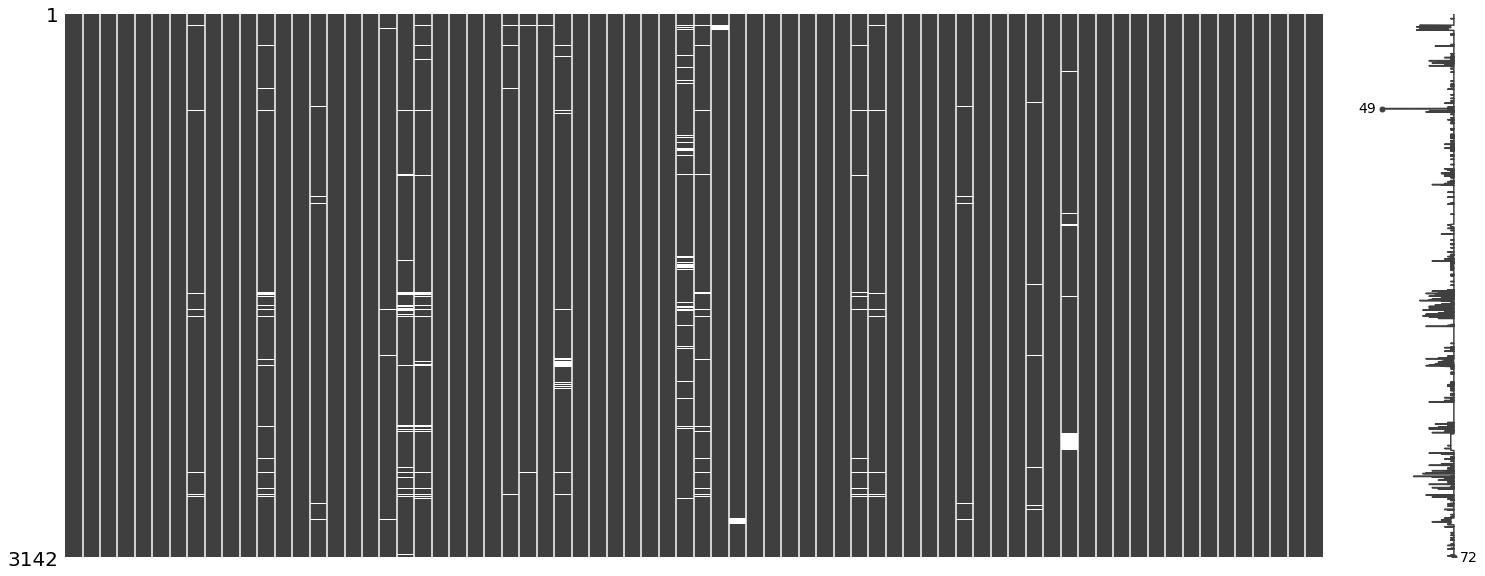

In [25]:
msno.matrix(df)

In [26]:
df.isna().mean().sort_values()

State FIPS Code                                                         0.000000
Mental health providers raw value                                       0.000000
Food insecurity raw value                                               0.000000
% 65 and older raw value                                                0.000000
% below 18 years of age raw value                                       0.000000
Population raw value                                                    0.000000
Some college raw value                                                  0.000000
Income inequality raw value                                             0.000000
Social associations raw value                                           0.000000
% Females raw value                                                     0.000000
Homeownership raw value                                                 0.000000
Severe housing problems raw value                                       0.000000
Percentage of households wit

In [27]:
df.dropna(subset=['High school graduation raw value'], inplace = True)
headers2_ = [x for x in df.columns if 'raw value' in x or 'Percentage of households' in x]
df[headers2_] = df[headers2_].apply(pd.to_numeric)

# df.loc[df['Drinking water violations raw value'].isna(), ['Drinking water violations raw value']].index%3
for ind, val in df.loc[df['Drinking water violations raw value'].isna(), ['Drinking water violations raw value']].iterrows():
    if ind%3 == 0:
        df['Drinking water violations raw value'][ind] = 1
    else:
        df['Drinking water violations raw value'][ind] = 0

C:\Users\prayt\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\prayt\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Change columns to numeric

In [28]:
#df.to_numeric(df['High school graduation raw value'], )

headers2_ = [x for x in df.columns if 'raw value' in x or 'Percentage of households' in x]
df[headers2_] = df[headers2_].apply(pd.to_numeric)

# type(df['High school graduation raw value'][5])  # this line confirms relevant fields converted to numeric dtype 

In [29]:
df['High school graduation raw value'].quantile(np.linspace(.25,.75,3))

0.25    0.846078
0.50    0.895328
0.75    0.935000
Name: High school graduation raw value, dtype: float64

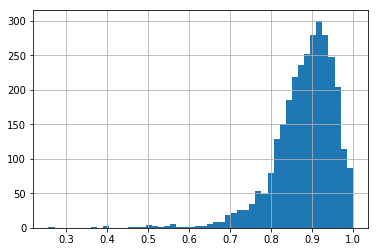

In [30]:
df['hs_grad_bins']=pd.qcut(df['High school graduation raw value'], 4, labels=['0-84%', '84-89%','89-93%','93-100%'])
df['High school graduation raw value'].hist(bins=50)

In [33]:
reg_test_pickle = {
    'df': df,
    }
with open('reg_test_pickle.pickle', 'wb') as f:
    pickle.dump(reg_test_pickle, f, pickle.HIGHEST_PROTOCOL)

# df.columns('State FIPS Code', 'County FIPS Code', '5-digit FIPS Code',
#        'State Abbreviation', 'Name', 'Release Year',
#        'County Ranked (Yes=1/No=0)')

### Check for colinearity

In [31]:
def gen_high_corrs(corr_matrix):
    temps = {'rs':[], 'cs':[], 'vs':[]}
    for col in corr_matrix.columns:
        for row, value in corr_matrix[col].iteritems():
            if value > .5 or value <-.5:
                temps['rs'].append(row)
                temps['cs'].append(col)
                temps['vs'].append(value)
                temps_df = pd.DataFrame(temps)
    return temps_df #, temps_df.shape

def corr_check(header_index_list, df):
    mini_corr_matrix = df.drop(header_index_list, axis=1).corr()
    sns.heatmap(mini_corr_matrix)
    return mini_corr_matrix#gen_high_corrs(mini_corr_matrix).cs.value_counts()



### Identify variables with high correlations to eachother

In [108]:
corr_matrix['High school graduation raw value'].sort_values()[:-4]

Severe housing problems raw value                                      -0.388523
Sexually transmitted infections raw value                              -0.367216
Children in single-parent households raw value                         -0.353172
Percentage of households with high housing costs                       -0.308747
Violent crime raw value                                                -0.302623
Severe housing cost burden raw value                                   -0.301027
Children eligible for free or reduced price lunch raw value            -0.292416
Mental health providers raw value                                      -0.287194
% American Indian and Alaskan Native raw value                         -0.282311
Percentage of households with overcrowding                             -0.251839
% Non-Hispanic African American raw value                              -0.242660
Children in poverty raw value                                          -0.234772
Unemployment raw value      

['Poor or fair health raw value', 'Frequent physical distress raw value', 'Premature age-adjusted mortality raw value', 'Children in poverty raw value', 'Food insecurity raw value', 'Frequent mental distress raw value', 'Premature death raw value', 'Children eligible for free or reduced price lunch raw value', 'Adult smoking raw value', 'Teen births raw value', 'Children in single-parent households raw value', 'Poor mental health days raw value', 'Some college raw value', 'Physical inactivity raw value', 'Insufficient sleep raw value', 'Food environment index raw value', '% Non-Hispanic white raw value', 'Severe housing problems raw value', 'Injury deaths raw value', 'Preventable hospital stays raw value', 'Driving alone to work raw value', 'Mammography screening raw value', 'Flu vaccinations raw value', 'Injury deaths raw value', 'Social associations raw value', 'Limited access to healthy foods raw value', 'Long commute - driving alone raw value', 'Food environment index raw value', '

,Poor physical health days raw value,Low birthweight raw value,Adult obesity raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Uninsured raw value,Primary care physicians raw value,Dentists raw value,Mental health providers raw value,High school graduation raw value,Unemployment raw value,Income inequality raw value,Violent crime raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Diabetes prevalence raw value,Other primary care providers raw value,Median household income raw value,Homeownership raw value,Population raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
Poor physical health days raw value,1.000000,0.492669,0.424765,-0.641436,-0.031610,0.278115,0.263832,-0.244086,-0.222831,-0.010869,-0.133781,0.542213,0.469090,0.273636,0.300893,0.054918,0.178071,0.238931,0.139613,0.643875,-0.018451,-0.657428,-0.148493,-0.107901,-0.032655,0.286442,0.207934,-0.220310,-0.047077,0.000602,-0.016948,0.047873,0.153491
Low birthweight raw value,0.492669,1.000000,0.276007,-0.509150,-0.052540,0.436322,0.231170,-0.144370,-0.159230,-0.033764,-0.161490,0.320608,0.475352,0.383562,0.202356,-0.041986,0.239707,0.006908,-0.060739,0.489759,0.006276,-0.413679,-0.188230,-0.012587,-0.055006,0.688299,-0.080445,-0.096953,-0.042337,-0.028422,-0.065461,0.112798,0.027052
Adult obesity raw value,0.424765,0.276007,1.000000,-0.388442,-0.003479,0.183052,0.040757,-0.299670,-0.271520,-0.240177,0.029075,0.245203,0.118750,0.106472,0.322031,-0.091962,-0.209447,-0.039820,-0.007326,0.668267,-0.041429,-0.458040,0.093901,-0.247067,-0.051740,0.328332,0.074488,-0.313439,-0.113982,-0.292162,-0.237675,0.068598,0.241509
Excessive drinking raw value,-0.641436,-0.509150,-0.388442,1.000000,0.123317,-0.155476,-0.339471,0.234218,0.272266,0.128452,0.030801,-0.318374,-0.306452,-0.145561,-0.165931,-0.014193,-0.039092,-0.065127,0.012718,-0.665332,0.036456,0.537948,-0.018041,0.120486,-0.172839,-0.362280,-0.007391,0.184865,0.040268,0.006489,0.020332,-0.187055,-0.256506
Alcohol-impaired driving deaths raw value,-0.031610,-0.052540,-0.003479,0.123317,1.000000,-0.004670,-0.077490,-0.004090,0.042908,0.043043,-0.038536,0.050453,-0.027326,-0.029459,-0.131086,0.014531,-0.014425,0.038387,0.083376,-0.062655,-0.025087,0.016095,0.034466,-0.017530,0.067223,-0.035742,0.136829,0.011446,0.037031,-0.080356,-0.072442,-0.043976,0.067695
Sexually transmitted infections raw value,0.278115,0.436322,0.183052,-0.155476,-0.004670,1.000000,0.245725,0.065180,0.114022,0.214800,-0.367216,0.251499,0.431458,0.519146,0.141526,0.010293,0.350689,0.376649,0.200707,0.159466,0.173707,-0.190369,-0.541813,0.140730,-0.364328,0.594618,0.356590,0.102319,0.034353,0.088225,0.093056,0.157717,-0.274470
Uninsured raw value,0.263832,0.231170,0.040757,-0.339471,-0.077490,0.245725,1.000000,-0.234999,-0.243357,-0.167966,-0.085788,0.124876,0.197714,0.128037,-0.118033,0.070407,-0.038705,0.409572,0.181931,0.162265,-0.091665,-0.355521,-0.107203,-0.069224,-0.035123,0.184362,0.254541,-0.099317,-0.001987,0.441331,0.397575,-0.101950,0.161273
Primary care physicians raw value,-0.244086,-0.144370,-0.299670,0.234218,-0.004090,0.065180,-0.234999,1.000000,0.549926,0.442902,-0.075424,-0.151961,0.036019,0.098498,-0.071732,0.057020,0.244534,-0.052099,0.008277,-0.305941,0.482570,0.316526,-0.286122,0.200965,-0.074668,-0.050925,-0.010265,0.300777,0.055253,-0.043019,0.013281,0.193793,-0.428193
Dentists raw value,-0.222831,-0.159230,-0.271520,0.272266,0.042908,0.114022,-0.243357,0.549926,1.000000,0.444800,-0.149247,-0.099667,0.009685,0.110552,-0.060922,0

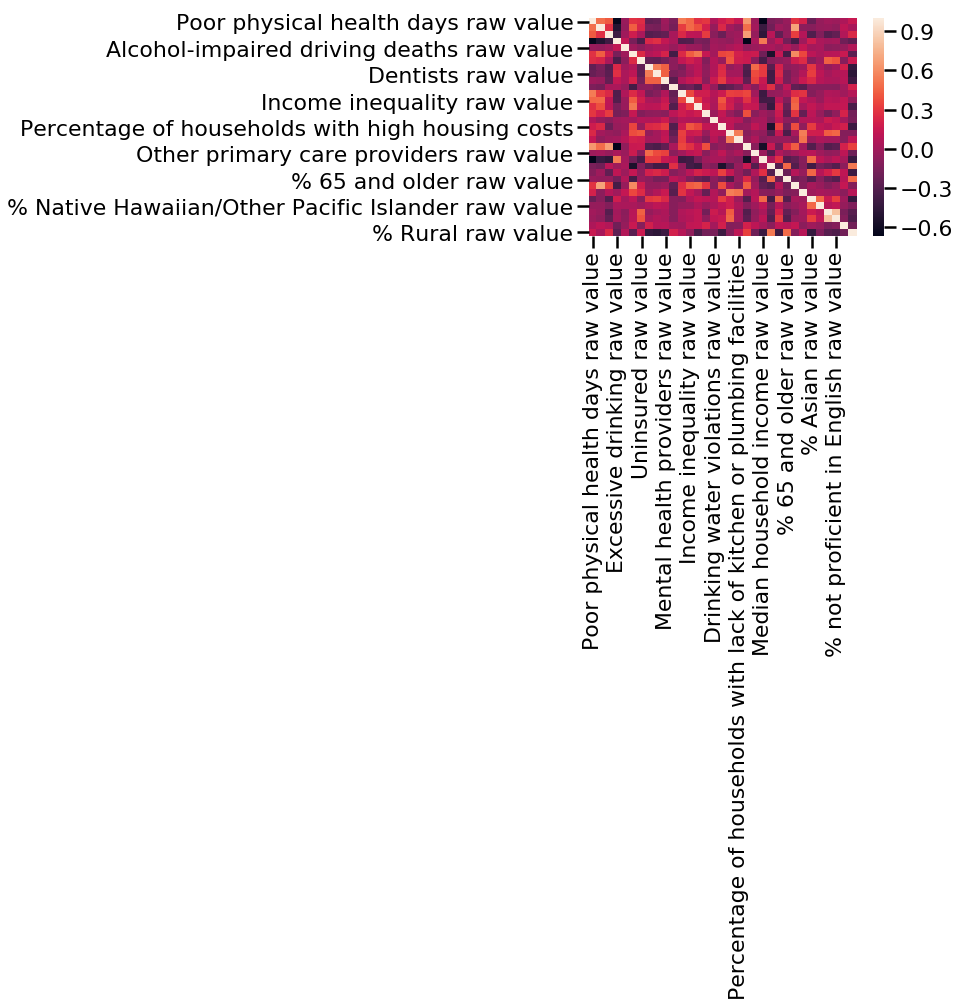

In [102]:
corr_matrix = df.corr()
drop_high_corrs_list = gen_high_corrs(corr_matrix).cs.value_counts().index[[0,1,2,3,4,5,7,9,10,12,14,16,17,18,19,20,22]]
temp_ls = list(drop_high_corrs_list)
temp_ls = temp_ls + ['Severe housing problems raw value',
               'Injury deaths raw value', 
               'Preventable hospital stays raw value', 
               'Driving alone to work raw value', 
               'Mammography screening raw value', 
               'Flu vaccinations raw value', 
               'Injury deaths raw value',
               'Social associations raw value', 
               'Limited access to healthy foods raw value',
               'Long commute - driving alone raw value', 
               'Food environment index raw value',
               'Access to exercise opportunities raw value',
               'Uninsured adults raw value', 
               'Uninsured children raw value',
               'Severe housing cost burden raw value',
               '% below 18 years of age raw value',
               'Life expectancy raw value']
print(temp_ls)
corr_check(temp_ls, df)

### Define and drop all columns that will be removed to reduce multicolinearity.

In [ ]:
extraneous_features = ['Poor or fair health raw value', 
                       'Frequent physical distress raw value', 
                       'Premature age-adjusted mortality raw value', 
                       'Food insecurity raw value', 
                       'Children in poverty raw value', 
                       'Frequent mental distress raw value', 
                       'Premature death raw value', 
                       'Poor physical health days raw value', 
                       'Adult smoking raw value', 
                       'Poor mental health days raw value', 
                       'Excessive drinking raw value', 
                       'Diabetes prevalence raw value', 
                       'Some college raw value', 
                       'Physical inactivity raw value', 
                       'Insufficient sleep raw value', 
                       'Low birthweight raw value', 
                       '% Non-Hispanic white raw value', 
                       'Severe housing problems raw value', 
                       'Injury deaths raw value', 
                       'Preventable hospital stays raw value', 
                       'Driving alone to work raw value', 
                       'Mammography screening raw value', 
                       'Flu vaccinations raw value', 
                       'Injury deaths raw value', 
                       'Social associations raw value', 
                       'Limited access to healthy foods raw value', 
                       'Long commute - driving alone raw value', 
                       'Food environment index raw value', 
                       'Access to exercise opportunities raw value', 
                       'Uninsured adults raw value', 
                       'Uninsured children raw value', 
                       'Severe housing cost burden raw value', 
                       '% below 18 years of age raw value',
                       'High school graduation raw value',
                       'hs_grad_bins'
                       ]

features = df.drop(extraneous_features, axis=1)
headers3_ = [x for x in features.columns if 'raw value' in x or 'Percentage of households' in x]
features = df[headers3_]
features_and_target = df 
target = df['hs_grad_bins']

In [ ]:
extas_remove_for_target_pickle= ['Poor or fair health raw value', 
                       'Frequent physical distress raw value', 
                       'Premature age-adjusted mortality raw value', 
                       'Food insecurity raw value', 
                       'Children in poverty raw value', 
                       'Frequent mental distress raw value', 
                       'Premature death raw value', 
                       'Poor physical health days raw value', 
                       'Adult smoking raw value', 
                       'Poor mental health days raw value', 
                       'Excessive drinking raw value', 
                       'Diabetes prevalence raw value', 
                       'Some college raw value', 
                       'Physical inactivity raw value', 
                       'Insufficient sleep raw value', 
                       'Low birthweight raw value', 
                       '% Non-Hispanic white raw value', 
                       'Severe housing problems raw value', 
                       'Injury deaths raw value', 
                       'Preventable hospital stays raw value', 
                       'Driving alone to work raw value', 
                       'Mammography screening raw value', 
                       'Flu vaccinations raw value', 
                       'Injury deaths raw value', 
                       'Social associations raw value', 
                       'Limited access to healthy foods raw value', 
                       'Long commute - driving alone raw value', 
                       'Food environment index raw value', 
                       'Access to exercise opportunities raw value', 
                       'Uninsured adults raw value', 
                       'Uninsured children raw value', 
                       'Severe housing cost burden raw value', 
                       '% below 18 years of age raw value',
                       ]

target_and_features_df = df.drop(extas_remove_for_target_pickle, axis=1)
for col in target_and_features_df[headers3_].columns:
    a = features[col].mean()
    target_and_features_df[col].fillna(a, inplace=True)

In [ ]:
target_and_features_df.isna().any()

In [ ]:
## Generate correlation matrix
corr_matrix = features.corr()

# Plot correlation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(270, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Check missing data again

In [ ]:
msno.matrix(features)

In [ ]:
features.isna().mean().sort_values()

### Fill missing with average value for column

In [ ]:
for col in features.columns:
    a = features[col].mean()
    features[col].fillna(a, inplace=True)

In [ ]:
msno.matrix(features)

### Check feature variance

In [ ]:
features.hist(figsize=(20,20))

### Create pickle object for future use

In [ ]:
import pickle
clean_data = {
    'features': features,
    'target': target,
    'features_and_orig_hs_rates':target_and_features_df
    }
with open('clean_data.pickle', 'wb') as f:
    pickle.dump(clean_data, f, pickle.HIGHEST_PROTOCOL)

# Lets start modeling!

In [10]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [2]:
with open('clean_data.pickle', 'rb') as f:
    a_pickle = pickle.load(f)
features = a_pickle['features']
target = a_pickle['target']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=9373)

In [4]:
X_train.isna().any()

Adult obesity raw value                                                 False
Alcohol-impaired driving deaths raw value                               False
Sexually transmitted infections raw value                               False
Teen births raw value                                                   False
Uninsured raw value                                                     False
Primary care physicians raw value                                       False
Dentists raw value                                                      False
Mental health providers raw value                                       False
Unemployment raw value                                                  False
Income inequality raw value                                             False
Children in single-parent households raw value                          False
Violent crime raw value                                                 False
Air pollution - particulate matter raw value                    

In [5]:
scaler = RobustScaler()
pca = PCA()

logr = LogisticRegression() 
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
Xboost = xgb.XGBClassifier()
svc = SVC()

model_list = [knn, rfc, Xboost, svc]


### Ballpark # of PC's to keep
7 accounts for 95% of variation, we can experiment with #pcs around this.  

In [ ]:
pca_pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca)])
pca_pipe.set_params(pca__n_components=.95, pca__random_state=9373).fit_transform(X_train)
pca_pipe['pca'].explained_variance_ratio_

sns.scatterplot(range(pca_pipe['pca'].explained_variance_ratio_.shape[0]), np.cumsum(pca_pipe['pca'].explained_variance_ratio_))
plt.hlines(.95, 0, 31, color='red')


### KNN Model - very overfit - but still outperforms all the other models by a narrow margin on test.  

In [ ]:
pipe = Pipeline(steps=[('scaler', scaler), 
                       #('pca', pca), 
                       ('knn', knn)])

param_grid = {'knn__n_neighbors':list(range(22,30)),
             'knn__weights':['distance'],
             'knn__algorithm':['auto'],
             'knn__p':[1],
             }

knn_gs = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
knn_gs.fit(X_train, y_train)
print(knn_gs.score(X_train, y_train))
print(knn_gs.score(X_test, y_test))
knn_gs.best_params_
confusion_matrix(y_test, knn_gs.predict(X_test))

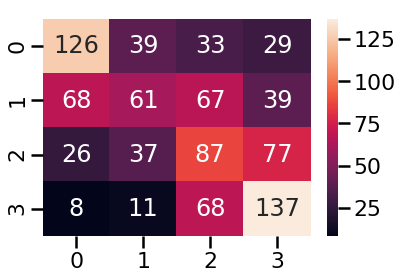

In [81]:
knn_conf = confusion_matrix(y_test, knn_gs.predict(X_test))
ax = sns.heatmap(knn_conf, annot=True, fmt="d")
plt.savefig('images/knn_conf_matrix.jpg')

### RandomForest Model  -  very overfit - overfitting seems to be an issue here....

In [ ]:
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('rfc', rfc)])

param_grid = {#'pca__n_components':[10,11,12],
             'rfc__n_estimators':[10,100,500],
             'rfc__max_depth':[5,10,20],
             'rfc__random_state':[9373]}

rfc_gs = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
rfc_gs.fit(X_train, y_train)
print(rfc_gs.score(X_train, y_train))
print(rfc_gs.score(X_test, y_test))
rfc_gs.best_params_
confusion_matrix(y_test, rfc_gs.predict(X_test))

### XGBoost model  

In [ ]:
# df.drop('State FIPS Code', 'County FIPS Code', '5-digit FIPS Code',
#        'State Abbreviation', 'Name', 'Release Year',
#        'County Ranked (Yes=1/No=0)')

In [ ]:
pipe = Pipeline(steps=[('scaler', scaler), 
                       #('pca', pca), 
                       ('xgb', Xboost)])
param_grid = {'xgb__eta':[.001],
             'xgb__gamma':[1,10],
             'xgb__max_depth':[5],
             'xgb__random_state':[9373]}

xgb_gs = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
xgb_gs.fit(X_train, y_train)
print(xgb_gs.score(X_test, y_test))
print(xgb_gs.best_params_)
confusion_matrix(y_test, xgb_gs.predict(X_test))


In [14]:
rscaled = RobustScaler()
X_train_scaled = rscaled.fit_transform(X_train)
X_test_scaled = rscaled.transform(X_test)

xgc_scores = {}
xgc_feature_sets = []
k=0
for i in range(0, 100, 10):
    for j in range(0, 100, 10):
        xgc = XGBClassifier(reg_alpha=i, reg_lambda=j)
        xgc.fit(X_train_scaled, y_train)

        
        xgc_features = pd.DataFrame(xgc.feature_importances_, 
                     index=X_train.columns, 
                     columns=["importance"]
                    ).sort_values(by="importance", ascending=False)
                                
        xgc_scores[k] = [i,
                         j,
                         xgc.score(X_train_scaled, y_train),
                         xgc.score(X_test_scaled, y_test),
                         np.sum(xgc_features.importance>0)]
        xgc_feature_sets.append(xgc_features)
        k += 1

In [15]:
xgc_reg_score = pd.DataFrame(xgc_scores, 
                             index=["alpha",
                                    "lambda",
                                    "train",
                                    "test",
                                    "n_features"
                                   ]).T

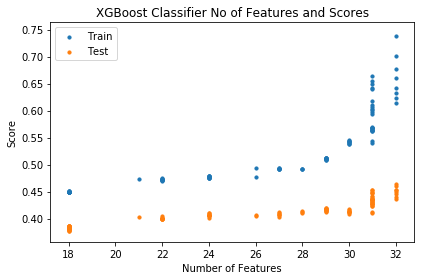

In [18]:
plt.scatter(xgc_reg_score.n_features, 
            xgc_reg_score.train,
            s=10
           )
plt.scatter(xgc_reg_score.n_features,
            xgc_reg_score.test,
            s=10
           )
plt.title("XGBoost Classifier No of Features and Scores")
plt.ylabel("Score")
plt.xlabel("Number of Features")

plt.legend(["Train","Test"])
plt.tight_layout()
#plt.savefig("../images/xgc_reg_score")

In [35]:
with open('reg_test_pickle.pickle', 'rb') as f:
    d_pickle = pickle.load(f)
reg_test_df = d_pickle['df']

In [36]:
reg_target = reg_test_df['hs_grad_bins']
reg_test_df.drop(['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code',
       'State Abbreviation', 'Name', 'Release Year',
       'County Ranked (Yes=1/No=0)', 'hs_grad_bins', 'High school graduation raw value'], axis=1, inplace=True)
for col in reg_test_df.columns:
    a = reg_test_df[col].mean()
    reg_test_df[col].fillna(a, inplace=True)

In [38]:
reg_test_df.head()

,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Dentists raw value,Mental health providers raw value,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
3,8824.057123,0.184111,4.200578,4.306739,0.084757,0.191247,0.375,7.2,0.311,0.686775,0.168780,0.288136,341.2,26.524208,0.085010,0.000415,0.000324,0.000162,6599.0,0.44,0.41,0.608547,0.038635,0.193,4.636664,0.247001,12.631731,272.282220,74.031808,11.7,0.0,0.149546,0.132052,0.024516,0.006374,0.859651,0.383,76.330589,438.7,0.128244,0.126384,0.142,0.134,0.119911,0.359054,0.109611,0.024762,0.000306,58343,0.479317,0.732877,0.126452,55504,0.239370,0.151196,0.192545,0.004756,0.012792,0.001045,0.028575,0.744739,0.008285,0.513422,0.420022
4,7224.632160,0.180605,4.098748,4.249649,0.083387,0.167955,0.310,8.0,0.238,0.719710,0.167150,0.318750,338.8,29.594009,0.106993,0.000729,0.000499,0.000912,3833.0,0.45,0.45,0.661339,0.039883,0.147,4.518560,0.251841,10.692213,203.660396,69.374289,10.3,1.0,0.138317,0.125693,0.010728,0.006072,0.847194,0.405,78.599498,348.4,0.126220,0.128226,0.113,0.123,0.054244,0.333059,0.135703,0.032380,0.000522,56607,0.450791,0.728593,0.127959,212628,0.218485,0.199470,0.089532,0.007760,0.011565,0.000687,0.045502,0.830474,0.004545,0.514528,0.422791
5,9586.165037,0.257734,5.067438,4.634994,0.109526,0.215409,0.443,5.6,0.282,0.536257,0.126987,0.296296,557.9,45.092838,0.125132,0.000385,0.000356,0.000079,4736.0,0.46,0.37,0.367740,0.059009,0.503,5.755063,0.572157,8.472944,414.277861,72.900134,11.5,0.0,0.154555,0.136743,0.020065,0.008134,0.834044,0.338,75.779457,469.8,0.162162,0.146323,0.180,0.232,0.107397,0.385632,0.165422,0.029014,0.000237,32490,0.737698,0.625068,0.135868,25270,0.207638,0.188247,0.479422,0.006529,0.004630,0.001860,0.042066,0.459557,0.011993,0.472299,0.677896
6,11783.543675,0.199969,4.363377,4.315710,0.111050,0.199164,0.378,7.6,0.349,0.162514,0.159252,0.272727,302.1,45.454545,0.096801,0.000574,0.000265,0.000088,5998.0,0.44,0.39,0.484063,0.043851,0.273,4.254594,0.295654,10.157665,89.349126,100.077937,11.2,0.0,0.109609,0.108081,0.001993,0.002847,0.8636

In [39]:
rX_train, rX_test, ry_train, ry_test = train_test_split(reg_test_df, reg_target, test_size=.3, random_state=9373)

In [41]:
rscaled = RobustScaler()
X_train_scaled = rscaled.fit_transform(rX_train)
X_test_scaled = rscaled.transform(rX_test)

xgc_scores = {}
xgc_feature_sets = []
k=0
for i in range(0, 100, 10):
    for j in range(0, 100, 10):
        xgc = XGBClassifier(reg_alpha=i, reg_lambda=j)
        xgc.fit(X_train_scaled, ry_train)

        
        xgc_features = pd.DataFrame(xgc.feature_importances_, 
                     index=rX_train.columns, 
                     columns=["importance"]
                    ).sort_values(by="importance", ascending=False)
                                
        xgc_scores[k] = [i,
                         j,
                         xgc.score(X_train_scaled, ry_train),
                         xgc.score(X_test_scaled, ry_test),
                         np.sum(xgc_features.importance>0)]
        xgc_feature_sets.append(xgc_features)
        k += 1

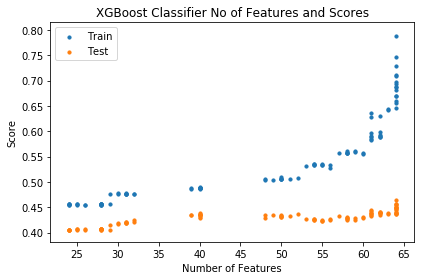

In [42]:
xgc_reg_score = pd.DataFrame(xgc_scores, 
                             index=["alpha",
                                    "lambda",
                                    "train",
                                    "test",
                                    "n_features"
                                   ]).T

plt.scatter(xgc_reg_score.n_features, 
            xgc_reg_score.train,
            s=10
           )
plt.scatter(xgc_reg_score.n_features,
            xgc_reg_score.test,
            s=10
           )
plt.title("XGBoost Classifier No of Features and Scores")
plt.ylabel("Score")
plt.xlabel("Number of Features")

plt.legend(["Train","Test"])
plt.tight_layout()

### SVC Model

In [ ]:
pipe = Pipeline(steps=[('scaler', scaler), 
                       #('pca', pca), 
                       ('svc', svc)])

param_grid = {#'pca__n_components':[18,19],
             'svc__gamma':['auto'],
             'svc__kernel':['rbf'],
             'svc__C':[.01,.1],
             'svc__random_state':[9373]}

svc_gs = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
svc_gs.fit(X_train, y_train)
print(svc_gs.score(X_train, y_train))
print(svc_gs.score(X_test, y_test))
print(svc_gs.best_params_)
confusion_matrix(y_test, svc_gs.predict(X_test))

### Logistic Regression

In [ ]:
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('logr', logr)])

param_grid = {'pca__n_components':[25,31,35],
             'logr__penalty':['l2'],
             'logr__solver':['saga'],
             'logr__C':[.05,.1],
             'logr__random_state':[9373],
             'logr__max_iter':[1000]}

logr_gs = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', error_score=0.0)
logr_gs.fit(X_train, y_train)
print(logr_gs.score(X_train, y_train))
print(logr_gs.score(X_test, y_test))
print(logr_gs.best_params_)
confusion_matrix(y_test, logr_gs.predict(X_test))

### Create pickle for models

In [ ]:
models_pickle = {
    'knn': knn_gs,
    'rfc': rfc_gs,
    'svc': svc_gs,
    'xgb': xgb_gs,
    'logr': logr_gs,
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
    }
with open('models.pickle', 'wb') as f:
    pickle.dump(models_pickle, f, pickle.HIGHEST_PROTOCOL)

## Clustering

In [1]:
from sklearn.metrics.cluster import calinski_harabasz_score, adjusted_rand_score
from sklearn.cluster import KMeans

import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Import Pickle

In [78]:
with open('models.pickle', 'rb') as f:
    b_pickle = pickle.load(f)
knn_gs = b_pickle['knn']
rfc_gs = b_pickle['rfc']
svc_gs = b_pickle['svc']
xgb_gs = b_pickle['xgb']
logr_gs = b_pickle['logr']
X_train = b_pickle['X_train']
X_test = b_pickle['X_test']
y_train = b_pickle['y_train']
y_test = b_pickle['y_test']
#target_and_features_df = b_pickle['target_and_features_df']

### Create Cluster df

In [2]:
with open('clean_data.pickle', 'rb') as f:
    d_pickle = pickle.load(f)
cluster_df = d_pickle['features_and_orig_hs_rates']

cluster_labels_df = cluster_df[['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code', 'hs_grad_bins', 'State Abbreviation']]
cluster_features_df = cluster_df.drop(['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code', 'Name','Release Year', 'County Ranked (Yes=1/No=0)','hs_grad_bins','State Abbreviation'], axis=1)

In [17]:
cluster_features_df['Median household income raw value'].quantile(np.linspace(.25,.75,3));

In [15]:
income_bins = pd.qcut(cluster_features_df['Median household income raw value'], 4, labels=['med family income<$42000      ', 
                                                        'med family income $42000-49000',
                                                        'med family income $49000-56700',
                                                        'med family income>$56700      '])


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cluster_features_df)
pca_df = PCA(.95).fit_transform(scaled_df)
ks =[]
labeled=[]
for cluster in list(range(2,10)):
    k_means = KMeans(n_clusters=cluster, 
                     init='k-means++', 
                     random_state=5341, max_iter=500)
    k_means.fit(pca_df)
    preds = k_means.labels_
    labeled.append(k_means.labels_)
    ks.append(calinski_harabasz_score(scaled_df, preds))


In [70]:
np.unique(labeled[2])

array([0, 1, 2, 3])

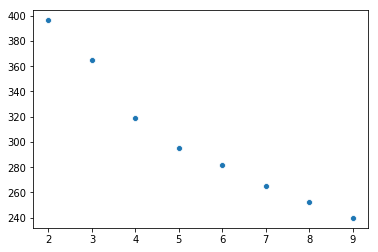

In [25]:
sns.scatterplot(list(range(2,10)), ks)

In [47]:
labeled[4]

array([4, 0, 1, ..., 0, 0, 0])

In [41]:
cluster_features_df.columns

Index(['Adult obesity raw value', 'Alcohol-impaired driving deaths raw value',
       'Sexually transmitted infections raw value', 'Teen births raw value',
       'Uninsured raw value', 'Primary care physicians raw value',
       'Dentists raw value', 'Mental health providers raw value',
       'High school graduation raw value', 'Unemployment raw value',
       'Income inequality raw value',
       'Children in single-parent households raw value',
       'Violent crime raw value',
       'Air pollution - particulate matter raw value',
       'Drinking water violations raw value',
       'Percentage of households with high housing costs',
       'Percentage of households with overcrowding',
       'Percentage of households with lack of kitchen or plumbing facilities',
       'Life expectancy raw value', 'Other primary care providers raw value',
       'Median household income raw value',
       'Children eligible for free or reduced price lunch raw value',
       'Homeownership raw val

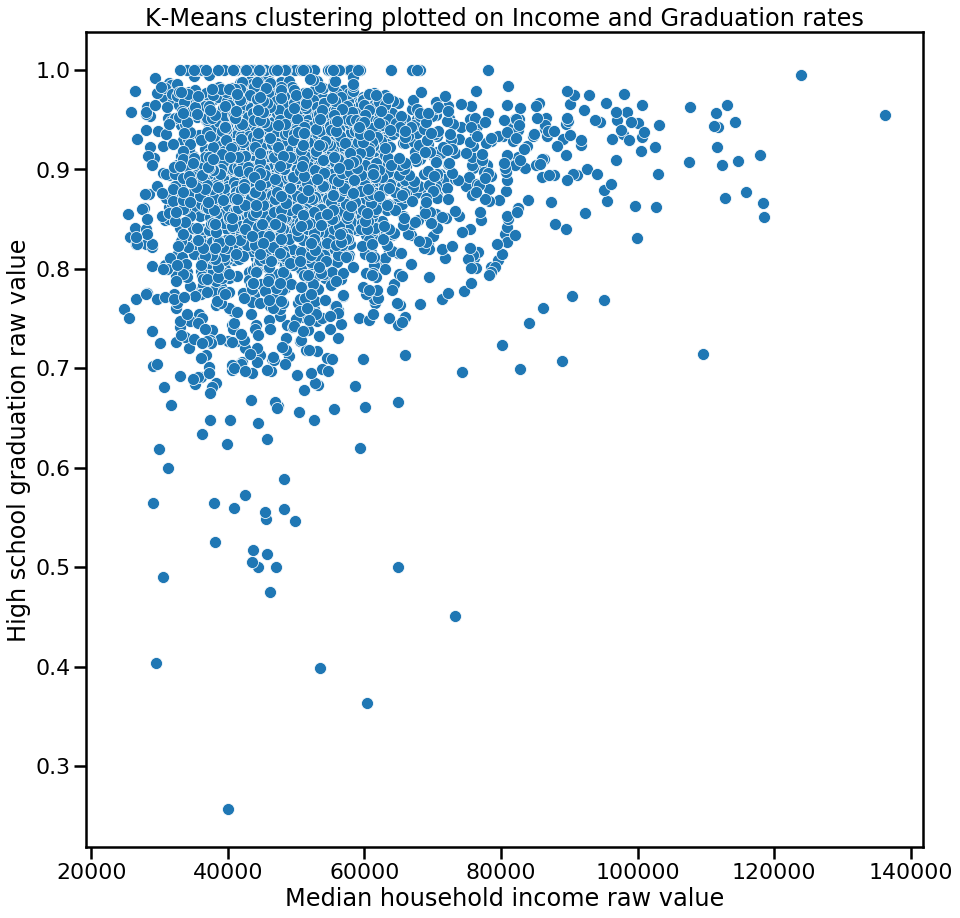

In [82]:
plt.figure(figsize=(15,15))
sns.scatterplot(cluster_features_df['Median household income raw value'], 
                cluster_features_df['High school graduation raw value'], 
               )
plt.title('K-Means clustering plotted on Income and Graduation rates')
sns.set_context('poster')
plt.savefig('images/income_grad_rates.jpg')

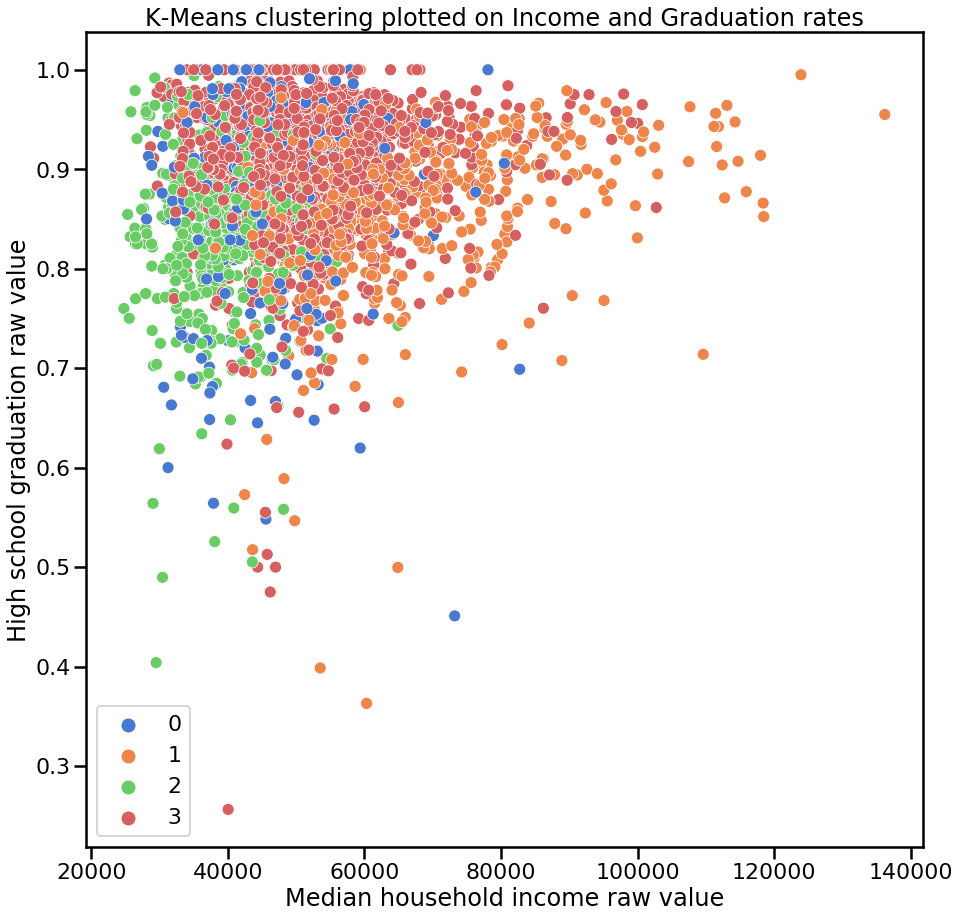

In [73]:
plt.figure(figsize=(15,15))
sns.scatterplot(cluster_features_df['Median household income raw value'], 
                cluster_features_df['High school graduation raw value'], 
                hue=labeled[2], 
                palette=sns.color_palette("muted", n_colors=4)
               )
plt.title('K-Means clustering plotted on Income and Graduation rates')
sns.set_context('poster')
plt.savefig('images/kcluster_income_grad_rates.jpg')

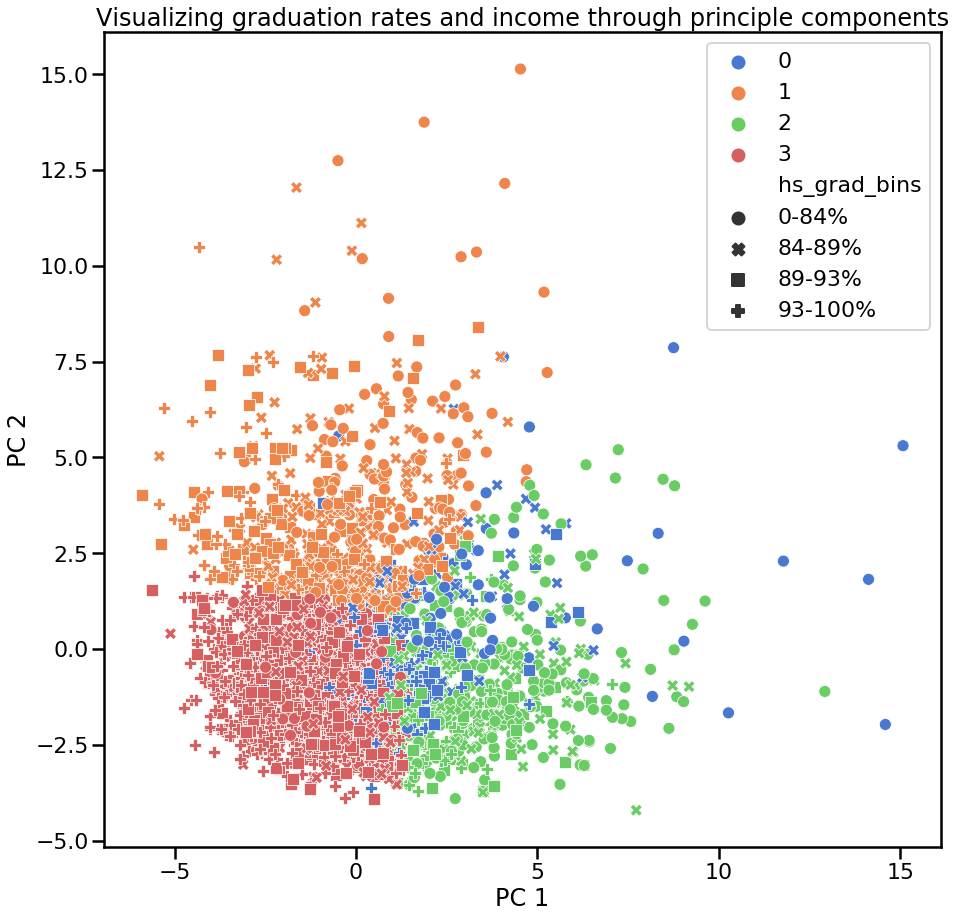

In [86]:
plt.figure(figsize=(15,15))
sns.scatterplot(pca_df[:,0], pca_df[:,1], hue=labeled[2], style=cluster_labels_df['hs_grad_bins'], 
                palette=sns.color_palette("muted", n_colors=4))
sns.set_context('poster')
plt.title('Visualizing graduation rates and income through principle components')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('images/pc_grad_rate.jpg')

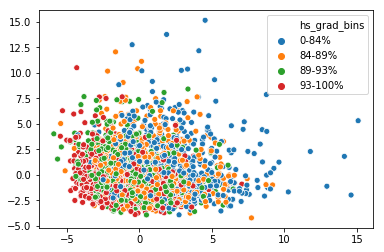

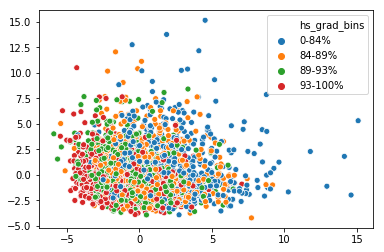

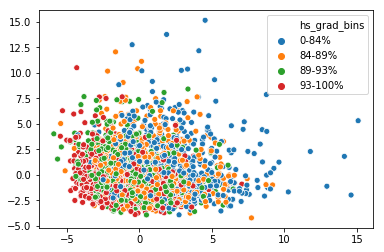

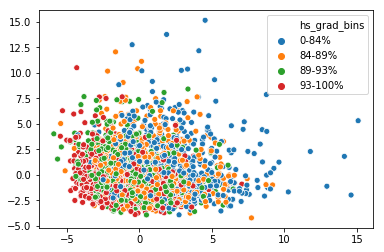

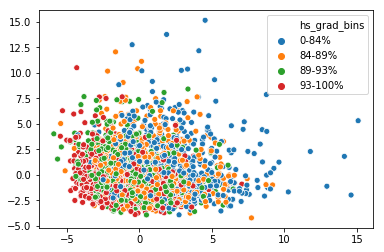

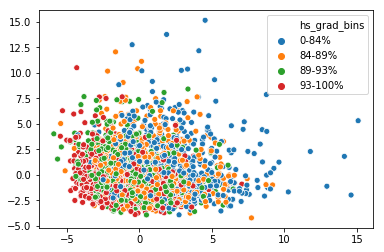

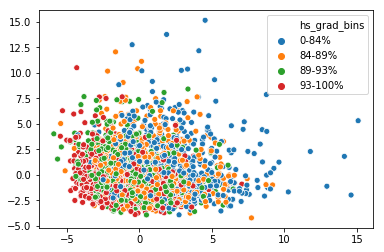

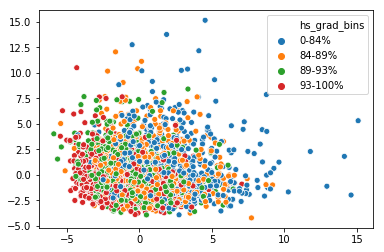

In [22]:
for label in labeled:
    ax = plt.figure()
    sns.scatterplot(pca_df[:,0], pca_df[:,1], hue=cluster_labels_df['hs_grad_bins']), style=label)

In [ ]:
len(list(range(0,18)))